# **LetsGrowMore Virtual Internship Program**

**Task 03**

**Level: Beginner**

**Project no. 2**

Project Name: *Stock Market Analysis and Prediction Using Stacked  LSTM*

Author: **Sayan Das**

In [7]:
# installing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#loading the dataframe
csv_url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
stk_df= pd.read_csv(csv_url)
stk_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
# dataframe description
stk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
#We have to convert the Date Dtype from object to datetype64
stk_df.sort_values(by="Date",inplace=True)

In [13]:
# sorting the values and resetting index
stk_df.sort_values(by="Date",inplace=True)
stk_df.reset_index(inplace=True)
stk_df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Text(0.5, 1.0, 'Stack Indexed View')

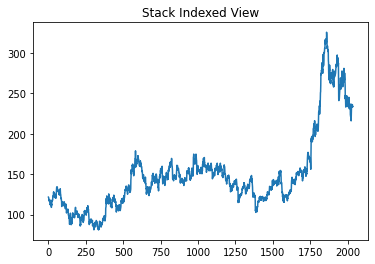

In [14]:
df1=stk_df['Close']
plt.plot(df1) 
plt.title("Stack Indexed View")

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


In [21]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
print(training_size)
print(test_size)

1424
611


# **Converting The array value into dataset matrix**

In [25]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y =t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(1323, 100)
(1323,)
(510, 100)
(510,)


(None, None)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 11s 272ms/step - loss: 0.0088 - val_loss: 0.0032
Epoch 2/60
19/19 [==============================] - 3s 169ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 3s 170ms/step - loss: 9.1185e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 3s 168ms/step - loss: 8.5040e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 168ms/step - loss: 8.0191e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 168ms/step - loss: 7.7041e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 3s 168ms/step - loss: 7.4114e-04 - val_loss: 9.6089e-04
Epoch 8/60
19/19 [==============================] - 3s 167ms/step - loss: 7.2574e-04 - val_loss: 8.9903e-04
Epoch 9/60
19/19 [==============================] - 3s 165ms/step - loss: 7.3209e-04 - val_loss: 8.7380e-04
Epoch 10/60
19/19 [==============================] - 3s 168

In [29]:
test_predict=model.predict(X_test)
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[143.73369 ],
       [143.90442 ],
       [142.95116 ],
       [140.17795 ],
       [138.50632 ],
       [138.06325 ],
       [139.41124 ],
       [141.10312 ],
       [141.44475 ],
       [140.92303 ],
       [140.56306 ],
       [141.77356 ],
       [142.61864 ],
       [144.25688 ],
       [146.52733 ],
       [144.35136 ],
       [141.74924 ],
       [141.41347 ],
       [142.22713 ],
       [147.62668 ],
       [152.25697 ],
       [154.27158 ],
       [154.28699 ],
       [151.90096 ],
       [151.69768 ],
       [151.65312 ],
       [152.2697  ],
       [154.1545  ],
       [154.91219 ],
       [154.78896 ],
       [155.0684  ],
       [153.77136 ],
       [150.33789 ],
       [144.44672 ],
       [141.01794 ],
       [140.21979 ],
       [140.57976 ],
       [139.78667 ],
       [137.28856 ],
       [133.3534  ],
       [130.69762 ],
       [129.53365 ],
       [127.50442 ],
       [126.73106 ],
       [124.711655],
       [122.05041 ],
       [121.34372 ],
       [121.1